In [35]:
import pandas as pd, numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection, grid_search 
from sklearn.cross_validation import train_test_split, cross_val_score

%matplotlib inline

In [36]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

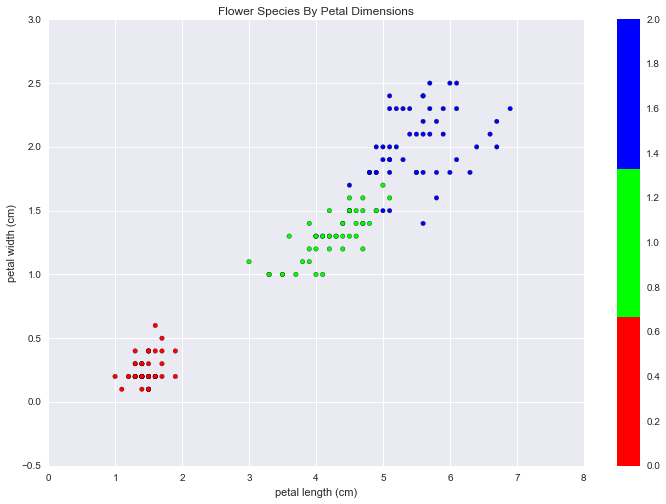

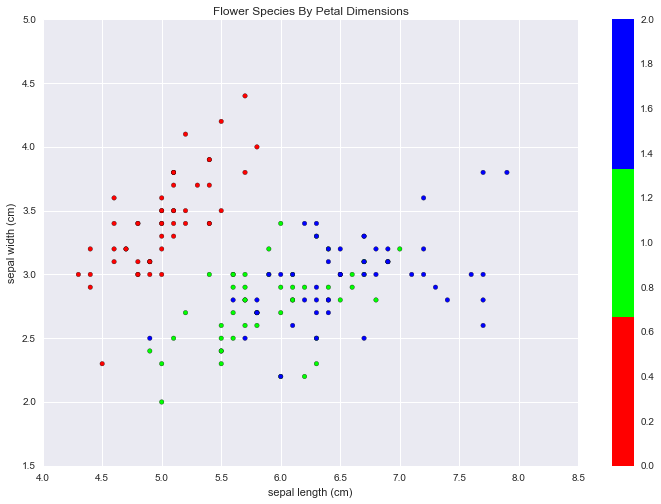

In [37]:
sns.set_style('darkgrid')

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

iris_df.columns
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris_df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', figsize=(12,8), cmap=cmap_bold, c=iris.target, title="Flower Species By Petal Dimensions")
iris_df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', figsize=(12,8), cmap=cmap_bold, c=iris.target, title="Flower Species By Petal Dimensions")
# print iris_df.columns

# iris_df.groupby('species').count()
# iris_df.describe().T
# iris.target

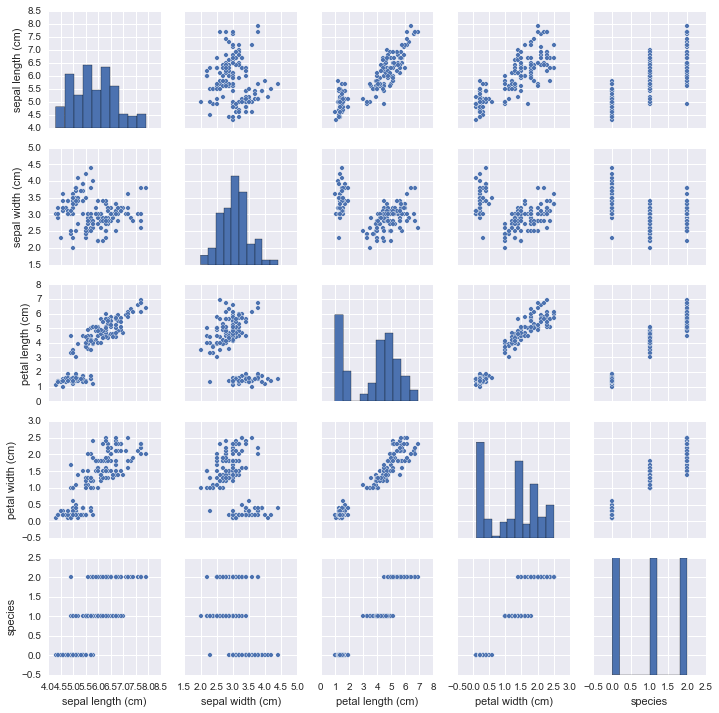

In [38]:
sns.pairplot(iris_df, size=2)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.3)
# train_test_split?

## What is the optimal number of neighbors
Manually building a list of scores based on the number of neighbors.  Will a low or high number be better?

In [40]:

num_neighbors  =   range(1, 41, 2)
scores         =   []

for num in num_neighbors:
    classifier = neighbors.KNeighborsClassifier(num)
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
    
len(scores), len(num_neighbors)

(20, 20)

### Let's take a look

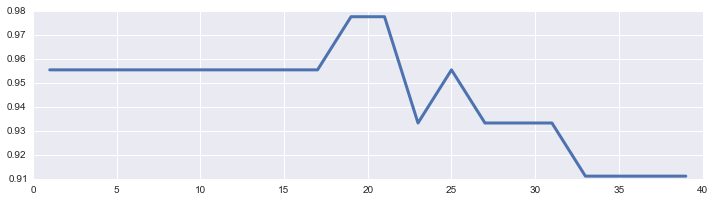

In [41]:
sns.set_style('darkgrid')
sns.plt.figure(figsize=(12, 3))
_ = sns.plt.plot(num_neighbors, scores, linewidth=3)

### But what if we want to be lazy?

We can use Sklearn's GridSearch to do the work of finding optimal parameters for us.  This is can be a bit misleading because it won't tell you if you're overfitting and in some cases, you will miss important nuances that you could infer better predictions from.

In [33]:
knn_clf    =  neighbors.KNeighborsClassifier()
parameters =  {'n_neighbors': range(20,51,2), 'weights': ['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
cv_clf     =  grid_search.GridSearchCV(knn_clf, parameters)

cv_clf.fit(X_train, y_train)
# neighbors.KNeighborsClassifier?


GridSearchCV(cv=None,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [34]:
print "Best score: %s, Best params: %s" % (cv_clf.best_score_, cv_clf.best_params_)

Best score: 0.933333333333, Best params: {'n_neighbors': 20, 'weights': 'distance', 'algorithm': 'auto'}


In [5]:
from IPython.core.display import HTML

HTML("this is a test")